In [ ]:
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path="/content/gdrive/MyDrive/ML/KNN/titanic_train.csv"
df=pd.read_csv(path)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**<h3>It Show Size Of Our DataSet</h3>**

In [ ]:
df.shape

(891, 12)

**<h3>It Shows How Many Unique Values In Columns </h3>**

In [ ]:
df['Pclass'].unique()

array([3, 1, 2])

In [ ]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

**<h3> It Shows How Many Different Types Of Values In Columns </h3>**

In [ ]:
df['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

In [ ]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

**<h3>split  surename  from name (create function) add new column of surename<h3>**

In [ ]:
df2=df.copy()

In [ ]:
#Without Function

# df2[['Surename','Name']]=df2.Name.str.split(",",1,expand=True)

In [ ]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
def surename(cl):
  return cl.split(',')[0]

In [ ]:
# Using Funtion

df2.insert(4,"Surename",df2['Name'].apply(surename))

In [ ]:
df2

,PassengerId,Survived,Pclass,Name,Surename,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",Braund,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",Allen,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",Montvila,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",Graham,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",Johnston,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",Behr,male,26.0,0,0,111369,30.0000,C148,C


**<h3>Find Null/NaN Values in DataFrame</h3>**

In [ ]:
#find null value

df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Surename         0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**<h3> How To Drop Column</h3>**

Here We Can See , Cabin Column  Have Lots Off Null Value So We Have To Drop That Column

In [ ]:
#which columns need to be drop ,drop it

df3=df2.drop("Cabin",axis=1)
df3

,PassengerId,Survived,Pclass,Name,Surename,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",Braund,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle,female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",Allen,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",Montvila,male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",Graham,female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",Johnston,female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",Behr,male,26.0,0,0,111369,30.0000,C


**<h3>Statisical Representation Of DataFrame</h3>**

It Show About Mean,Min,Max...etc

In [ ]:
df3.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df3.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Surename         0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

** <h3> Now We Handle Null Values In Our DataFrame </h3> **

<h3>In Our DataFrame Age And Embarked Has Null Value, So We Handle It.</h3>

In [ ]:
df3.Embarked.unique()
df3.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df3['Embarked'].mode()

0    S
dtype: object

In [ ]:
df3["Embarked"].fillna("S", inplace = True)

In [ ]:
df3.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Surename         0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [ ]:
# df3[df3["Age"]== df3.isna()]
# df3
# Print Only NaN In Ages
df3[df3.isna().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Surename,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",Moran,male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",Williams,male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",Masselmani,female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",Emir,male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",O'Dwyer,female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",Razi,male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",Sage,female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",van Melkebeke,male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",Laleff,male,NaN,0,0,349217,7.8958,S


In [ ]:
df3.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Surename         0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [ ]:
df3.groupby("Age").sum()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
Age,,,,,,
0.42,804,1,3,0,1,8.5167
0.67,756,1,2,1,1,14.5000
0.75,1115,2,6,4,2,38.5166
0.83,911,2,4,1,3,47.7500
0.92,306,1,1,1,2,151.5500
...,...,...,...,...,...,...
70.00,1419,0,3,1,1,81.5000
70.50,117,0,3,0,0,7.7500
71.00,591,0,2,0,0,84.1584


In [ ]:
#how to insert a column at specific index/location
# df3['Location'] = df3["Embarked"].map({'S':0,'C':1,'Q':2})
location=df3["Embarked"].map({'S':0,'C':1,'Q':2})
# df3=df3.drop(columns=['Location'])
df3.insert(3,'Location',location)

In [ ]:
pclass1=df3[df3['Pclass']==1]
pclass1

,PassengerId,Survived,Pclass,Location,Name,Surename,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings,female,38.0,1,0,PC 17599,71.2833,C
3,4,1,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle,female,35.0,1,0,113803,53.1000,S
6,7,0,1,0,"McCarthy, Mr. Timothy J",McCarthy,male,54.0,0,0,17463,51.8625,S
11,12,1,1,0,"Bonnell, Miss. Elizabeth",Bonnell,female,58.0,0,0,113783,26.5500,S
23,24,1,1,0,"Sloper, Mr. William Thompson",Sloper,male,28.0,0,0,113788,35.5000,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,0,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",Beckwith,female,47.0,1,1,11751,52.5542,S
872,873,0,1,0,"Carlsson, Mr. Frans Olof",Carlsson,male,33.0,0,0,695,5.0000,S
879,880,1,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",Potter,female,56.0,0,1,11767,83.1583,C
887,888,1,1,0,"Graham, Miss. Margaret Edith",Graham,female,19.0,0,0,112053,30.0000,S


In [ ]:
pclass1.Age= pclass1.Age.fillna(round(pclass1.Age.mean()))
pclass1.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


PassengerId    0
Survived       0
Pclass         0
Location       0
Name           0
Surename       0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
pclass2=df3[df3['Pclass']==2]


In [ ]:
pclass2.Age= pclass2.Age.fillna(round(pclass2.Age.mean()))
pclass2.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


PassengerId    0
Survived       0
Pclass         0
Location       0
Name           0
Surename       0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
pclass3=df3[df3['Pclass']==3]
round(pclass3.Age.mean())

25

In [ ]:
pclass3.Age= df3.Age.fillna(round(pclass3.Age.mean()))
pclass3.isna().sum()


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


PassengerId    0
Survived       0
Pclass         0
Location       0
Name           0
Surename       0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df3.Age.isna().sum()

177

In [ ]:
'''def half_age(mydf):
  return df3['Age'].div(2) '''

# df4=df3[df3.Age.div(2)]  
df3


,PassengerId,Survived,Pclass,Location,Name,Surename,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0,"Braund, Mr. Owen Harris",Braund,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,0,"Heikkinen, Miss. Laina",Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle,female,35.0,1,0,113803,53.1000,S
4,5,0,3,0,"Allen, Mr. William Henry",Allen,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,"Montvila, Rev. Juozas",Montvila,male,27.0,0,0,211536,13.0000,S
887,888,1,1,0,"Graham, Miss. Margaret Edith",Graham,female,19.0,0,0,112053,30.0000,S
888,889,0,3,0,"Johnston, Miss. Catherine Helen ""Carrie""",Johnston,female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,1,"Behr, Mr. Karl Howell",Behr,male,26.0,0,0,111369,30.0000,C


In [ ]:
#def halfage(a):
 # return a/2
# df3.Age.apply(halfage)    

In [ ]:
#create a set consisten 3 columns name sex and age

df4=df3[['Name','Sex','Age']]

In [ ]:
df4

,Name,Sex,Age
0,"Braund, Mr. Owen Harris",male,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss. Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,"Allen, Mr. William Henry",male,35.0
...,...,...,...
886,"Montvila, Rev. Juozas",male,27.0
887,"Graham, Miss. Margaret Edith",female,19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN
889,"Behr, Mr. Karl Howell",male,26.0


In [ ]:
df3.head()

,PassengerId,Survived,Pclass,Location,Name,Surename,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0,"Braund, Mr. Owen Harris",Braund,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,0,"Heikkinen, Miss. Laina",Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle,female,35.0,1,0,113803,53.1000,S
4,5,0,3,0,"Allen, Mr. William Henry",Allen,male,35.0,0,0,373450,8.0500,S


In [ ]:
df3

,PassengerId,Survived,Pclass,Location,Name,Surename,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0,"Braund, Mr. Owen Harris",Braund,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,0,"Heikkinen, Miss. Laina",Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle,female,35.0,1,0,113803,53.1000,S
4,5,0,3,0,"Allen, Mr. William Henry",Allen,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,"Montvila, Rev. Juozas",Montvila,male,27.0,0,0,211536,13.0000,S
887,888,1,1,0,"Graham, Miss. Margaret Edith",Graham,female,19.0,0,0,112053,30.0000,S
888,889,0,3,0,"Johnston, Miss. Catherine Helen ""Carrie""",Johnston,female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,1,"Behr, Mr. Karl Howell",Behr,male,26.0,0,0,111369,30.0000,C


In [ ]:
df3=pd.concat([pclass1,pclass2,pclass3],ignore_index=True)

In [ ]:
df3

,PassengerId,Survived,Pclass,Location,Name,Surename,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,2,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings,female,38.0,1,0,PC 17599,71.2833,C
1,4,1,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle,female,35.0,1,0,113803,53.1000,S
2,7,0,1,0,"McCarthy, Mr. Timothy J",McCarthy,male,54.0,0,0,17463,51.8625,S
3,12,1,1,0,"Bonnell, Miss. Elizabeth",Bonnell,female,58.0,0,0,113783,26.5500,S
4,24,1,1,0,"Sloper, Mr. William Thompson",Sloper,male,28.0,0,0,113788,35.5000,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,883,0,3,0,"Dahlberg, Miss. Gerda Ulrika",Dahlberg,female,22.0,0,0,7552,10.5167,S
887,885,0,3,0,"Sutehall, Mr. Henry Jr",Sutehall,male,25.0,0,0,SOTON/OQ 392076,7.0500,S
888,886,0,3,2,"Rice, Mrs. William (Margaret Norton)",Rice,female,39.0,0,5,382652,29.1250,Q
889,889,0,3,0,"Johnston, Miss. Catherine Helen ""Carrie""",Johnston,female,25.0,1,2,W./C. 6607,23.4500,S


In [ ]:

convert_dict = {'Age': int,
                
               }

df3=df3.astype(convert_dict)

In [ ]:
# df3.isna().sum()
df3.describe()

,PassengerId,Survived,Pclass,Location,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.361392,29.249158,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.635673,13.220459,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,2.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
(df3==1).sum(axis=0)

PassengerId      1
Survived       342
Pclass         216
Location       168
Name             0
Surename         0
Sex              0
Age              7
SibSp          209
Parch          118
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [ ]:
(df3['Age']==0).sum()
df3['Age']=df3['Age'].replace(0,round(df3.Age.mean()))

In [ ]:
(df3['Age']==0).sum()

0

In [ ]:
df3

,PassengerId,Survived,Pclass,Location,Name,Surename,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,2,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings,female,38,1,0,PC 17599,71.2833,C
1,4,1,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle,female,35,1,0,113803,53.1000,S
2,7,0,1,0,"McCarthy, Mr. Timothy J",McCarthy,male,54,0,0,17463,51.8625,S
3,12,1,1,0,"Bonnell, Miss. Elizabeth",Bonnell,female,58,0,0,113783,26.5500,S
4,24,1,1,0,"Sloper, Mr. William Thompson",Sloper,male,28,0,0,113788,35.5000,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,883,0,3,0,"Dahlberg, Miss. Gerda Ulrika",Dahlberg,female,22,0,0,7552,10.5167,S
887,885,0,3,0,"Sutehall, Mr. Henry Jr",Sutehall,male,25,0,0,SOTON/OQ 392076,7.0500,S
888,886,0,3,2,"Rice, Mrs. William (Margaret Norton)",Rice,female,39,0,5,382652,29.1250,Q
889,889,0,3,0,"Johnston, Miss. Catherine Helen ""Carrie""",Johnston,female,25,1,2,W./C. 6607,23.4500,S


In [ ]:
list2=['Age']

In [ ]:
outliers=pd.DataFrame(columns=["Features","NoOfOutliers"])

In [ ]:
outliers

,Features,NoOfOutliers


In [ ]:
for col in list2:
    q1=df[col].quantile(0.25)
    q2=df[col].quantile(0.50)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    low_value=q1-1.5*iqr
    high_value=q3+1.5*iqr
    outliers=outliers.append({'Features':col,'NoOfOutliers':df.loc[(df[col]>high_value) | (df[col]<low_value)].shape[0]},ignore_index=True)


    

In [ ]:
outliers

,Features,NoOfOutliers
0,Age,11


In [ ]:
df3

,PassengerId,Survived,Pclass,Location,Name,Surename,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,2,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings,female,38,1,0,PC 17599,71.2833,C
1,4,1,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle,female,35,1,0,113803,53.1000,S
2,7,0,1,0,"McCarthy, Mr. Timothy J",McCarthy,male,54,0,0,17463,51.8625,S
3,12,1,1,0,"Bonnell, Miss. Elizabeth",Bonnell,female,58,0,0,113783,26.5500,S
4,24,1,1,0,"Sloper, Mr. William Thompson",Sloper,male,28,0,0,113788,35.5000,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,883,0,3,0,"Dahlberg, Miss. Gerda Ulrika",Dahlberg,female,22,0,0,7552,10.5167,S
887,885,0,3,0,"Sutehall, Mr. Henry Jr",Sutehall,male,25,0,0,SOTON/OQ 392076,7.0500,S
888,886,0,3,2,"Rice, Mrs. William (Margaret Norton)",Rice,female,39,0,5,382652,29.1250,Q
889,889,0,3,0,"Johnston, Miss. Catherine Helen ""Carrie""",Johnston,female,25,1,2,W./C. 6607,23.4500,S


In [ ]:
df4=df3.copy()

In [ ]:
df4

,PassengerId,Survived,Pclass,Location,Name,Surename,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,2,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings,female,38,1,0,PC 17599,71.2833,C
1,4,1,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle,female,35,1,0,113803,53.1000,S
2,7,0,1,0,"McCarthy, Mr. Timothy J",McCarthy,male,54,0,0,17463,51.8625,S
3,12,1,1,0,"Bonnell, Miss. Elizabeth",Bonnell,female,58,0,0,113783,26.5500,S
4,24,1,1,0,"Sloper, Mr. William Thompson",Sloper,male,28,0,0,113788,35.5000,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,883,0,3,0,"Dahlberg, Miss. Gerda Ulrika",Dahlberg,female,22,0,0,7552,10.5167,S
887,885,0,3,0,"Sutehall, Mr. Henry Jr",Sutehall,male,25,0,0,SOTON/OQ 392076,7.0500,S
888,886,0,3,2,"Rice, Mrs. William (Margaret Norton)",Rice,female,39,0,5,382652,29.1250,Q
889,889,0,3,0,"Johnston, Miss. Catherine Helen ""Carrie""",Johnston,female,25,1,2,W./C. 6607,23.4500,S


In [ ]:
sex=df4["Sex"].map({'male':0,'female':1})
# df3=df3.drop(columns=['Location'])
df4.insert(4,'sex',sex)
sex

0      1
1      1
2      0
3      1
4      0
      ..
886    1
887    0
888    1
889    1
890    0
Name: Sex, Length: 891, dtype: int64

In [ ]:
x=df4.loc[:,['Pclass','Age','SibSp','Parch','Fare','Location','sex']]

In [ ]:
x

,Pclass,Age,SibSp,Parch,Fare,Location,sex
0,1,38,1,0,71.2833,1,1
1,1,35,1,0,53.1000,0,1
2,1,54,0,0,51.8625,0,0
3,1,58,0,0,26.5500,0,1
4,1,28,0,0,35.5000,0,0
...,...,...,...,...,...,...,...
886,3,22,0,0,10.5167,0,1
887,3,25,0,0,7.0500,0,0
888,3,39,0,5,29.1250,2,1
889,3,25,1,2,23.4500,0,1


In [ ]:
y=df4.loc[:,'Survived']

In [ ]:
y

0      1
1      1
2      0
3      1
4      1
      ..
886    0
887    0
888    0
889    0
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0,stratify=y)

In [ ]:
x_train.shape


(712, 7)

In [ ]:
y_train.shape

(712,)

In [ ]:
x_test.shape

(179, 7)

In [ ]:
y_test.shape


(179,)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
np.sqrt(len(x_test))

13.379088160259652

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=9,p=2)


In [ ]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.6871508379888268


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


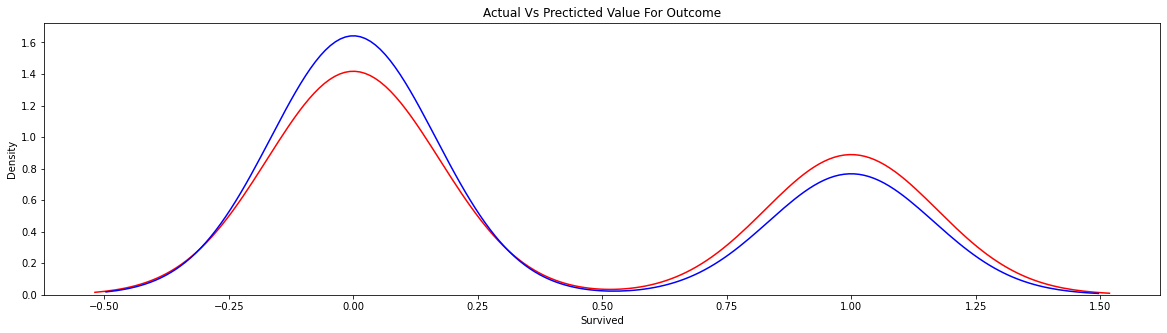

In [ ]:
plt.figure(figsize=[20,5])
ax=sns.distplot(y_test,hist=False,color="r",label="Actual Value")
sns.distplot(y_pred,hist=False,color="b",label="Predicted Value",ax=ax)
plt.title("Actual Vs Precticted Value For Outcome")
plt.show()
plt.close()

In [ ]:
y_test.shape

(179,)

In [ ]:
y_pred.shape

(179,)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)  
print(cm)

[[88 22]
 [34 35]]


In [ ]:
tp,fp,fn,tn=cm.ravel()

tn,fp,fn,tp

(35, 22, 34, 88)

In [ ]:
from sklearn.metrics import classification_report
matrix=classification_report(y_test,y_pred)

In [ ]:
print(matrix)

              precision    recall  f1-score   support

           0       0.72      0.80      0.76       110
           1       0.61      0.51      0.56        69

    accuracy                           0.69       179
   macro avg       0.67      0.65      0.66       179
weighted avg       0.68      0.69      0.68       179

